## 1. Data preprocessing and EDA:

In [2]:
%pip install numpy pandas matplotlib seaborn scikit-learn jupyterlab

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.8 MB 4.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/12.8 MB 8.0 MB/s eta 0:00:02
   ---------------------------- ----------- 9.2/12.8 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 19.6 MB/s  0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.0 MB 109.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 109.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 109.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 109.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 4.1 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.0 MB 3.3 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/11.0 MB 3.0 MB/s eta 0:00:03
   --

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time as tm

In [2]:
df = pd.read_csv("Final_df.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318565 entries, 0 to 318564
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time          318565 non-null  object 
 1   temperature   318565 non-null  float64
 2   soilMoisture  318565 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.3+ MB


,temperature,soilMoisture
count,318565.000000,318565.000000
mean,24.813514,99.399981
std,0.753247,0.605083
min,20.553129,79.000000
25%,24.090002,99.000000
50%,24.903046,99.000000
75%,25.374757,100.000000
max,26.788774,100.000000


In [3]:
df.head()

,time,temperature,soilMoisture
0,2025-11-12 09:08:00.248704936+00:00,23.008131,99
1,2025-11-12 09:08:02.764720638+00:00,23.008141,99
2,2025-11-12 09:08:07.681226269+00:00,23.035870,100
3,2025-11-12 09:08:12.481963698+00:00,23.058266,99
4,2025-11-12 09:08:17.397625407+00:00,23.055740,100


In [4]:
df.isnull().sum()

time            0
temperature     0
soilMoisture    0
dtype: int64

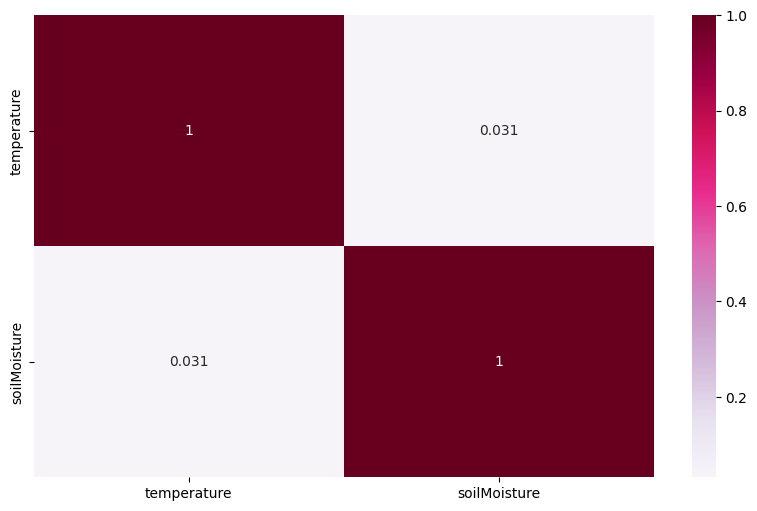

<Figure size 1000x600 with 0 Axes>

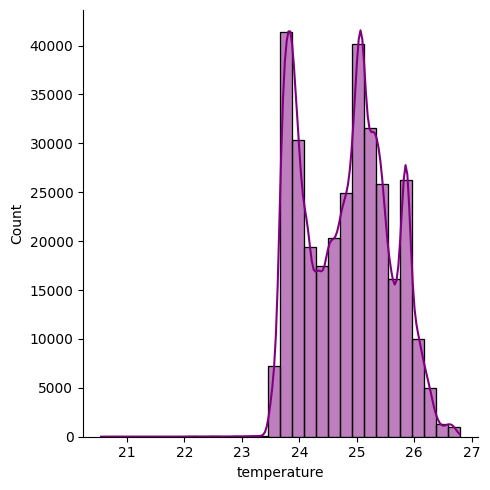

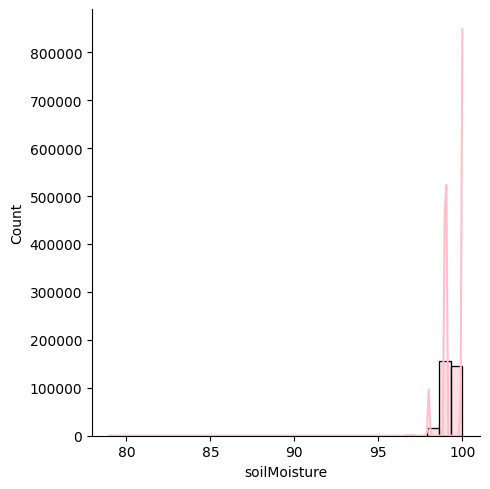

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['temperature', 'soilMoisture']].corr(), annot=True, cmap='PuRd')
plt.show()
plt.figure(figsize=(10,6))
sns.displot(df['temperature'], bins=30, kde=True, color='purple')
sns.displot(df['soilMoisture'], bins=30, kde=True, color='pink')
plt.show()



In [8]:
df.set_index('time', inplace=True)
df.head()

,temperature,soilMoisture
time,,
2025-11-12 09:08:00.248704936+00:00,23.008131,99
2025-11-12 09:08:02.764720638+00:00,23.008141,99
2025-11-12 09:08:07.681226269+00:00,23.035870,100
2025-11-12 09:08:12.481963698+00:00,23.058266,99
2025-11-12 09:08:17.397625407+00:00,23.055740,100


In [9]:
df.describe()

,temperature,soilMoisture
count,318565.000000,318565.000000
mean,24.813514,99.399981
std,0.753247,0.605083
min,20.553129,79.000000
25%,24.090002,99.000000
50%,24.903046,99.000000
75%,25.374757,100.000000
max,26.788774,100.000000


In [10]:
df.index = pd.to_datetime(df.index)


In [11]:
df.index

DatetimeIndex(['2025-11-12 09:08:00.248704936+00:00',
               '2025-11-12 09:08:02.764720638+00:00',
               '2025-11-12 09:08:07.681226269+00:00',
               '2025-11-12 09:08:12.481963698+00:00',
               '2025-11-12 09:08:17.397625407+00:00',
               '2025-11-12 09:08:22.087914111+00:00',
               '2025-11-12 09:08:24.273661543+00:00',
               '2025-11-12 09:08:26.895821718+00:00',
               '2025-11-12 09:08:29.223980499+00:00',
               '2025-11-12 09:08:31.700356068+00:00',
               ...
               '2025-11-25 10:39:06.921174114+00:00',
               '2025-11-25 10:39:11.715189453+00:00',
               '2025-11-25 10:39:16.531205342+00:00',
               '2025-11-25 10:39:21.426286968+00:00',
               '2025-11-25 10:39:23.626132864+00:00',
               '2025-11-25 10:39:26.230529350+00:00',
               '2025-11-25 10:39:30.931017320+00:00',
               '2025-11-25 10:39:35.735291136+00:00',
         

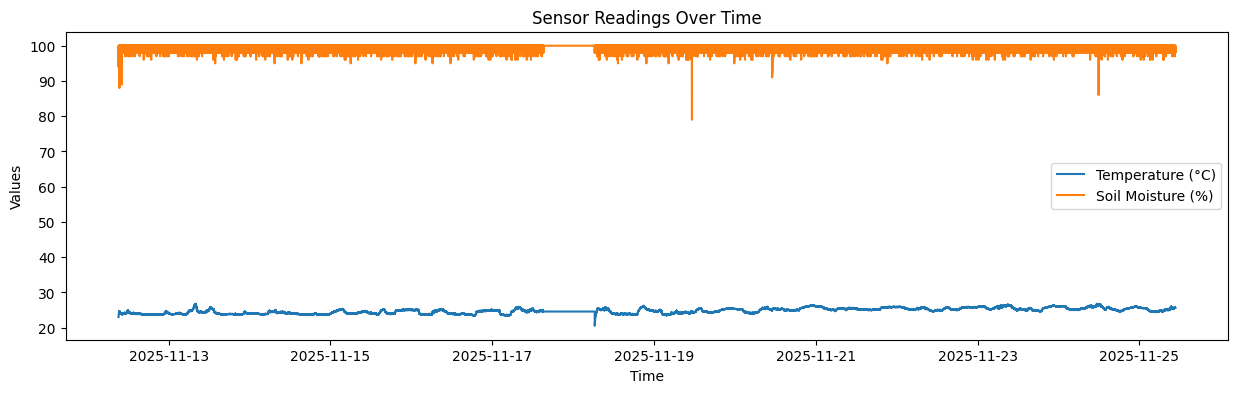

In [12]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['temperature'], label='Temperature (°C)')
plt.plot(df.index, df['soilMoisture'], label='Soil Moisture (%)')
plt.gca().set(title='Sensor Readings Over Time', xlabel='Time', ylabel='Values')
plt.legend()
plt.show()


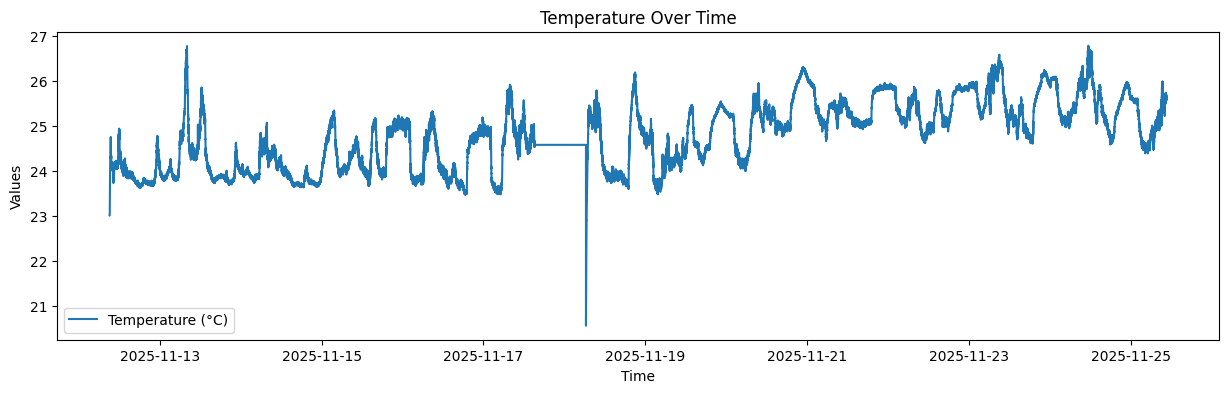

In [13]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['temperature'], label='Temperature (°C)')
plt.gca().set(title='Temperature Over Time', xlabel='Time', ylabel='Values')
plt.legend()
plt.show()


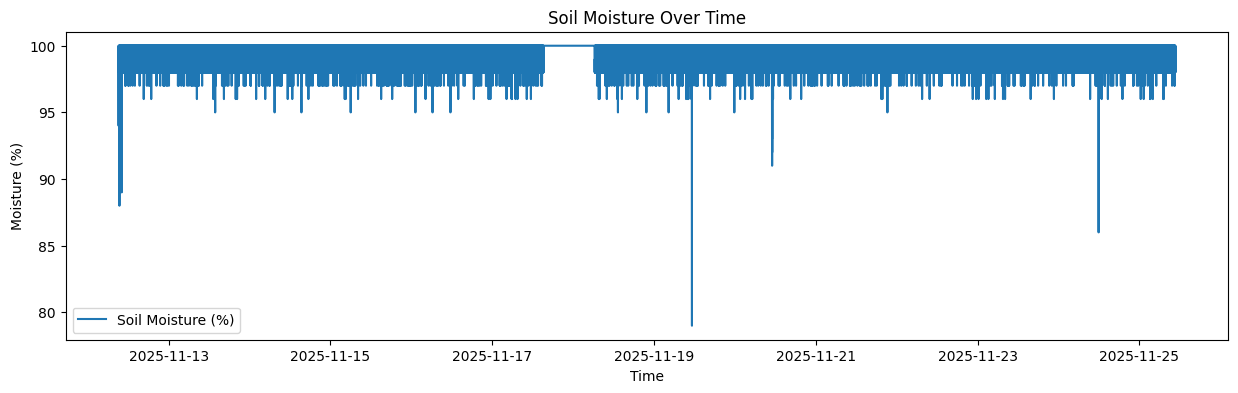

In [14]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['soilMoisture'], label='Soil Moisture (%)')
plt.gca().set(title='Soil Moisture Over Time', xlabel='Time', ylabel='Moisture (%)')
plt.legend()
plt.show()


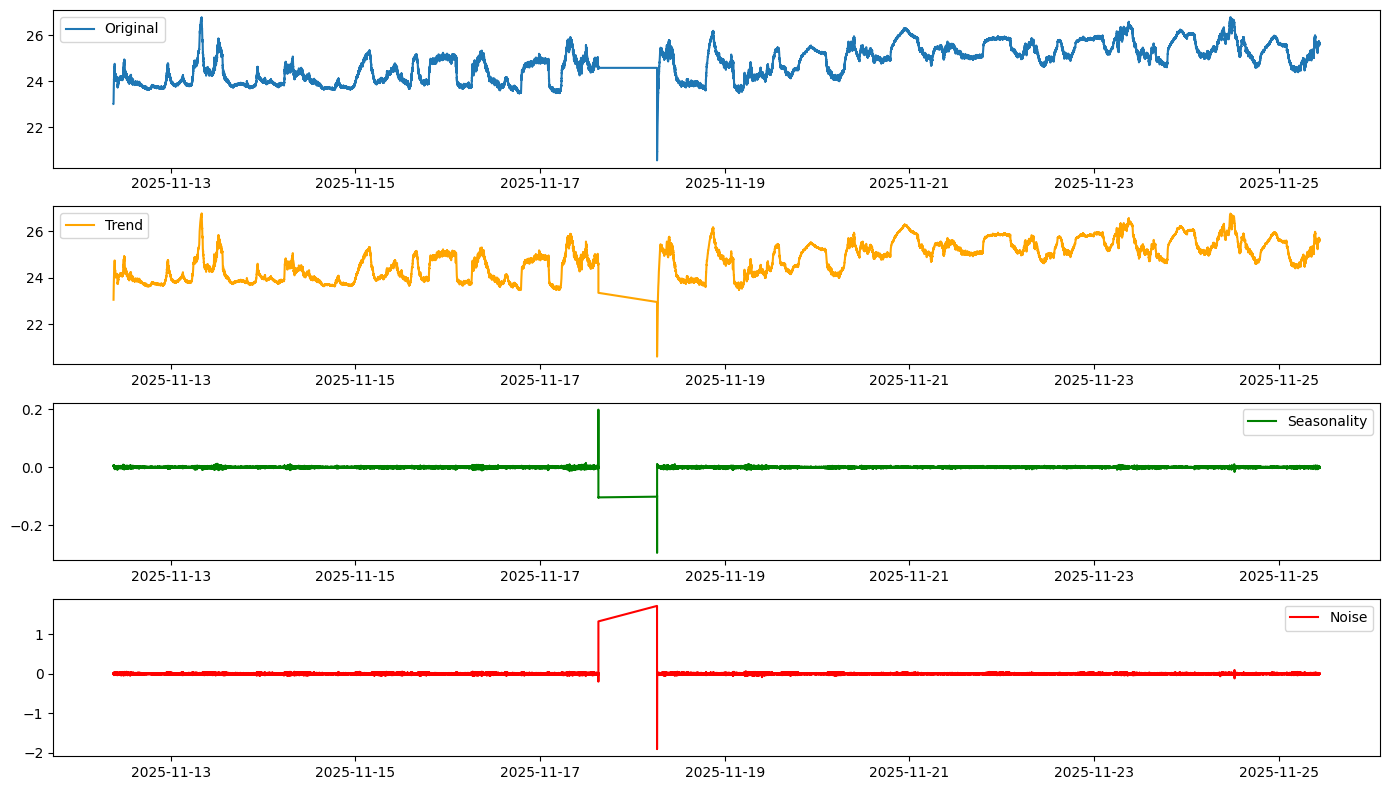

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Choose the column to decompose
y = df['temperature']

# Trend (simple moving average)
trend = y.rolling(window=10, center=True).mean()

# Seasonality = signal - trend (after removing NA)
seasonality = (y - trend).rolling(window=20, center=True).mean()

# Noise = remainder
noise = y - trend - seasonality

plt.figure(figsize=(14,8))

plt.subplot(4,1,1)
plt.plot(y, label='Original')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonality, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(noise, label='Noise', color='red')
plt.legend()

plt.tight_layout()
plt.show()


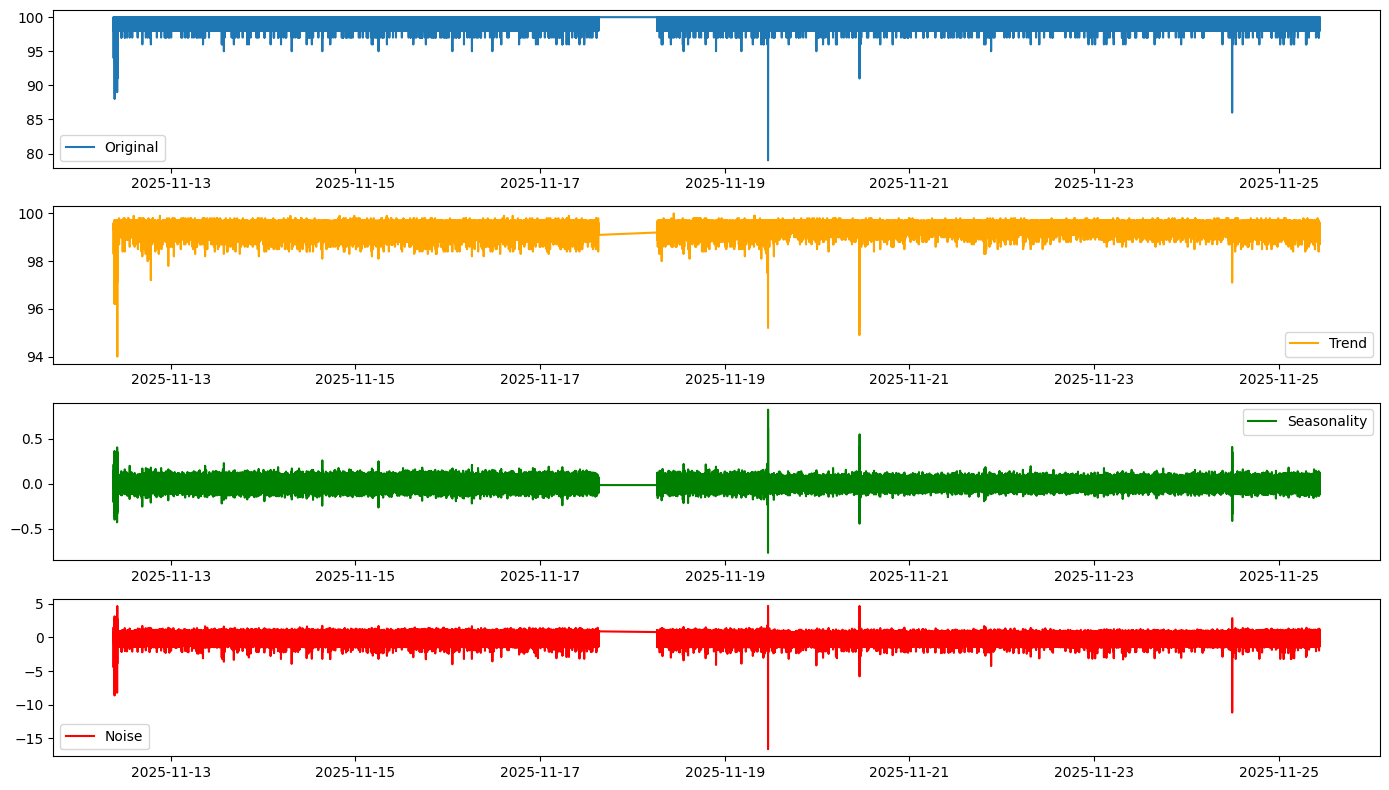

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Choose the column to decompose
y = df['soilMoisture']

# Trend (simple moving average)
trend = y.rolling(window=10, center=True).mean()

# Seasonality = signal - trend (after removing NA)
seasonality = (y - trend).rolling(window=20, center=True).mean()

# Noise = remainder
noise = y - trend - seasonality

plt.figure(figsize=(14,8))

plt.subplot(4,1,1)
plt.plot(y, label='Original')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonality, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(noise, label='Noise', color='red')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
%pip install statsmodels 

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 3.3 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.6 MB 5.9 MB/s eta 0:00:02
   ----------------------------- ---------- 7.1/9.6 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 15.3 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   ---------

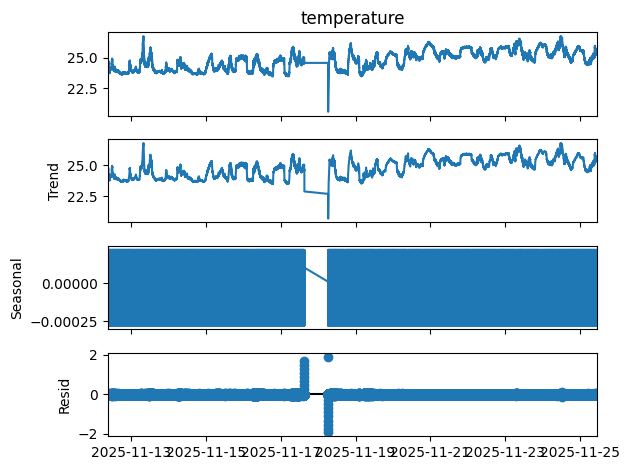

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['temperature'], model='additive', period=20)

result.plot()
plt.show()


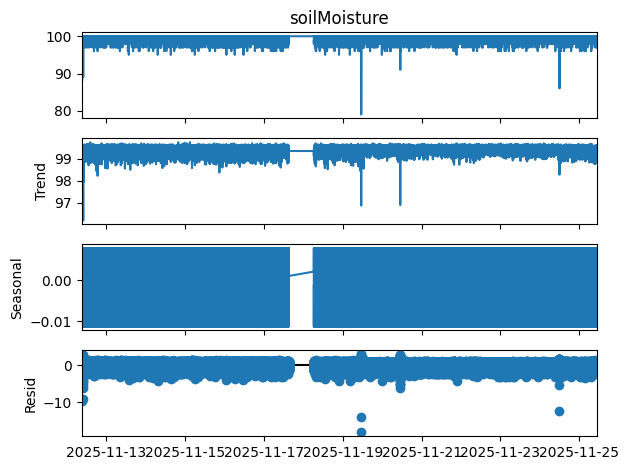

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['soilMoisture'], model='additive', period=20)

result.plot()
plt.show()


In [26]:
%pip install pmdarima 

   ---------------------------------------- 0.0/715.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/715.6 kB ? eta -:--:--
   ---------------------------------------- 715.6/715.6 kB 4.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 13.3 MB/s  0:00:00

   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   -------

In [27]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

In [28]:
X_train = df[df.index < '2025-11-23 01:45:50']["temperature"]
X_valid  = df[df.index >= '2025-11-23 01:45:50']["temperature"]
y = df['temperature']

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train Shape (256631,)
X_Valid Shape (61934,)


In [29]:
model = ARIMA(X_train, order=(2,1,2))   # p, d, q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:               256631
Model:                 ARIMA(2, 1, 2)   Log Likelihood              749358.984
Date:                Thu, 27 Nov 2025   AIC                       -1498707.967
Time:                        14:19:26   BIC                       -1498655.690
Sample:                             0   HQIC                      -1498692.746
                             - 256631                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1269      0.015      8.676      0.000       0.098       0.156
ar.L2         -0.2874      0.006    -46.460      0.000      -0.300      -0.275
ma.L1         -0.1932      0.015    -13.204      0.0

In [30]:
n = len(X_valid)
forecast = model_fit.forecast(steps=n)
print(forecast)


256631    25.916141
256632    25.916467
256633    25.916386
256634    25.916282
256635    25.916292
            ...    
318560    25.916316
318561    25.916316
318562    25.916316
318563    25.916316
318564    25.916316
Name: predicted_mean, Length: 61934, dtype: float64


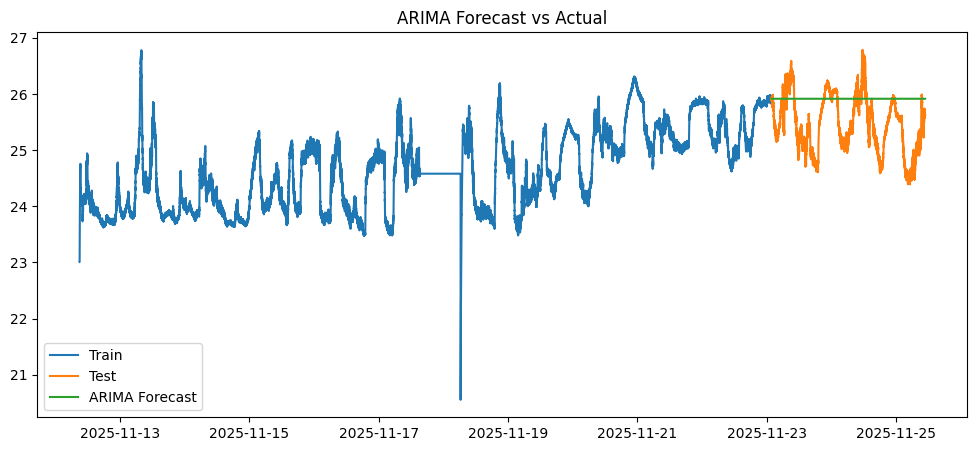

In [31]:
train = X_train
test = X_valid

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [32]:
# regression model for temperature prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['soilMoisture']]
y = df['temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


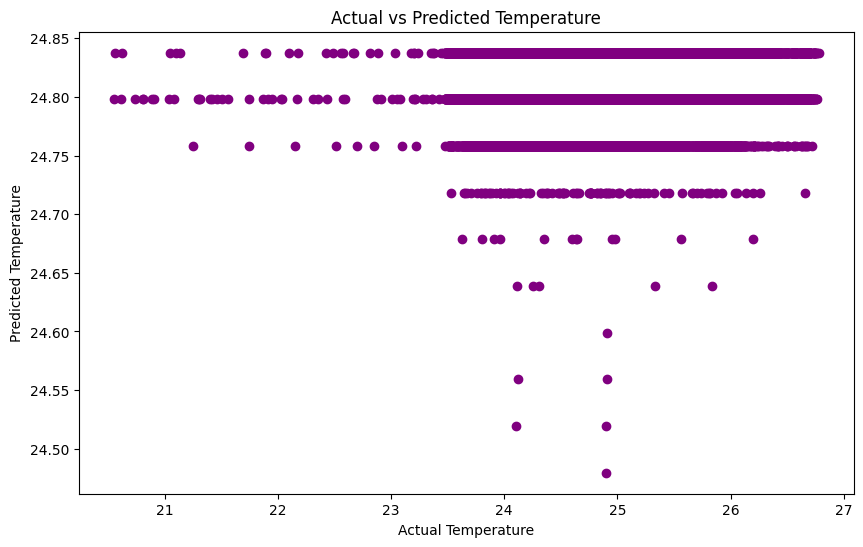

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.5718686182985201
R^2 Score: 0.0008454069902951167


In [43]:
# regression model for soil Moisture prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['temperature']]
y = df['soilMoisture']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


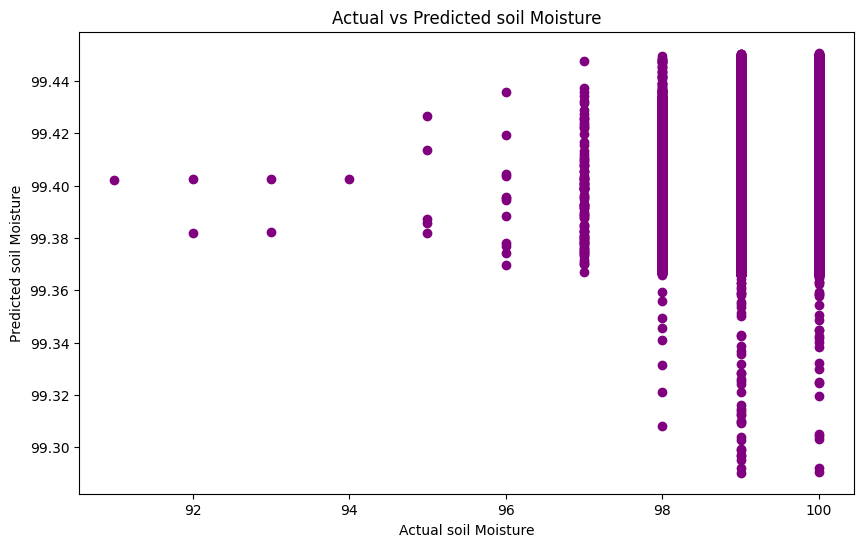

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual soil Moisture")
plt.ylabel("Predicted soil Moisture")
plt.title("Actual vs Predicted soil Moisture")
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.3621336096333593
R^2 Score: 0.0008407014514524302


In [54]:
%pip install tensorflow keras

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 5.6 MB/s eta 0:01:00
    --------------------------------------- 4.7/331.9 MB 16.8 MB/s eta 0:00:20
   - -------------------------------------- 16.0/331.9 MB 37.3 MB/s eta 0:00:09
   - -------------------------------------- 16.0/331.9 MB 37.3 MB/s eta 0:00:09
   - -------------------------------------- 16.0/331.9 MB 37.3 MB/s eta 0:00:09
   - -------------------------------------- 16.0/331.9 MB 37.3 MB/s eta 0:00:09
   - -------------------------------------- 16.5/331.9 MB 12.8 MB/s eta 0:00:25
   -- ------------------------------------- 16.8/331.9 MB 11.6 MB/s eta 0:00:28
   -- ------------------------------------- 17.0/331.9 MB 10.2 MB/s eta 0:00:31
   -- ------------------------------------- 17.3/331.9 MB 9.5 MB/s eta 0:00:34
   -- ------------------------------------- 17.8/331.9 MB 8.4 MB/s eta 0:00:38
   -- ------------------------------------- 18.4/331.9

In [56]:
# LSTM model for temperature prediction based on soil moisture readings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['soilMoisture', 'temperature']])


X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])  # soilMoisture
    y.append(scaled_data[i, 1])       # temperature
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32)
# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate((np.zeros((y_pred.shape[0], 1)), y_pred), axis=1))[:, 1]
y_test = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 1)), y_test.reshape(-1, 1)), axis=1))[:, 1]




Epoch 1/3
7963/7963 ━━━━━━━━━━━━━━━━━━━━ 221s 28ms/step - loss: 0.0142
Epoch 2/3
7963/7963 ━━━━━━━━━━━━━━━━━━━━ 230s 29ms/step - loss: 0.0131
Epoch 3/3
7963/7963 ━━━━━━━━━━━━━━━━━━━━ 230s 29ms/step - loss: 0.0131
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step


LSTM Model - Mean Squared Error: 0.9174783760980654
LSTM Model - R^2 Score: -2.640829142073315


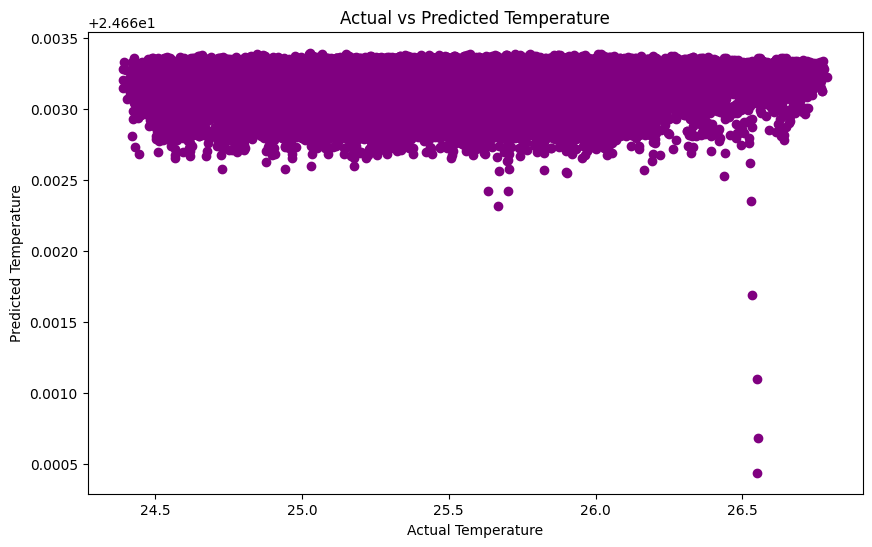

In [57]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"LSTM Model - Mean Squared Error: {mse}")
print(f"LSTM Model - R^2 Score: {r2}")
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()